In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
df.dtypes

review       object
sentiment    object
dtype: object

In [5]:
df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

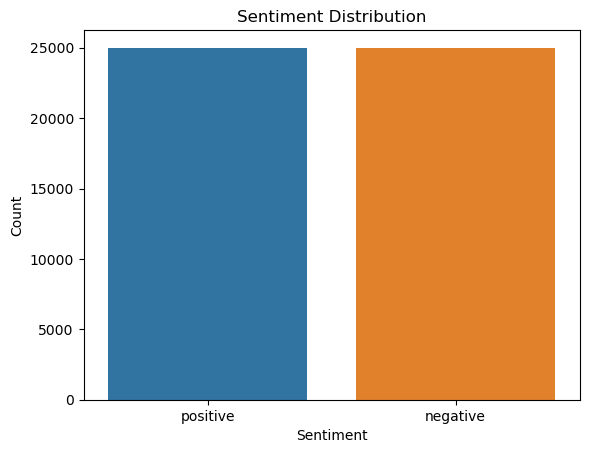

In [6]:
sns.countplot(data=df, x="sentiment")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [7]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [8]:
def sentiment_to_binary(sentiment):
    if sentiment == "positive":
        return 1
    else:
        return 0

df["sentiment"] = df["sentiment"].apply(sentiment_to_binary)

df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [9]:
tokenized_review = df["review"].apply(word_tokenize)
lemmatizer = WordNetLemmatizer()
df["lemmatized_review"] = tokenized_review.apply(lambda words: [lemmatizer.lemmatize(word) for word in words])
df["lemmatized_review"] = df["lemmatized_review"].apply(lambda words: " ".join(words))
df.head()

,review,sentiment,lemmatized_review
0,One of the other reviewers has mentioned that ...,1,One of the other reviewer ha mentioned that af...
1,A wonderful little production. <br /><br />The...,1,A wonderful little production . < br / > < br ...
2,I thought this was a wonderful way to spend ti...,1,I thought this wa a wonderful way to spend tim...
3,Basically there's a family where a little boy ...,0,Basically there 's a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,Petter Mattei 's `` Love in the Time of Money ...


In [10]:
stop_set = set(stopwords.words("english"))
vectorizer = TfidfVectorizer(strip_accents="ascii", stop_words=list(stop_set))

In [11]:
X = vectorizer.fit_transform(df["lemmatized_review"])
y = df["sentiment"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

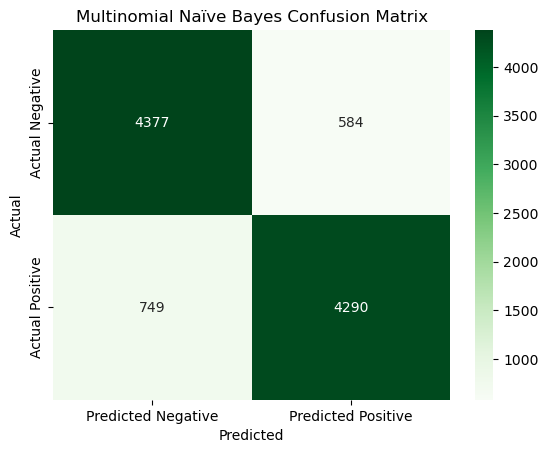

In [13]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

mnb_acc = round((mnb.score(X_test, y_test) * 100), 1)
mnb_precision = round((precision_score(y_test, y_pred) * 100), 1)
mnb_recall = round((recall_score(y_test, y_pred) * 100), 1)
mnb_f1 = round((f1_score(y_test, y_pred) * 100), 1)

cm = confusion_matrix(y_test, y_pred)
x_labels = ["Predicted Negative", "Predicted Positive"]
y_labels = ["Actual Negative", "Actual Positive"]
sns.heatmap(data=cm, fmt="d", annot=True, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.title("Multinomial Naïve Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

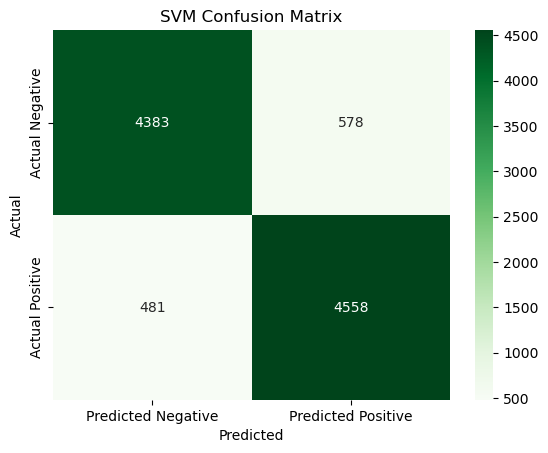

In [14]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

svm_acc = round((svm.score(X_test, y_test) * 100), 1)
svm_precision = round((precision_score(y_test, y_pred) * 100), 1)
svm_recall = round((recall_score(y_test, y_pred) * 100), 1)
svm_f1 = round((f1_score(y_test, y_pred) * 100), 1)

cm = confusion_matrix(y_test, y_pred)
x_labels = ["Predicted Negative", "Predicted Positive"]
y_labels = ["Actual Negative", "Actual Positive"]
sns.heatmap(data=cm, fmt="d", annot=True, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

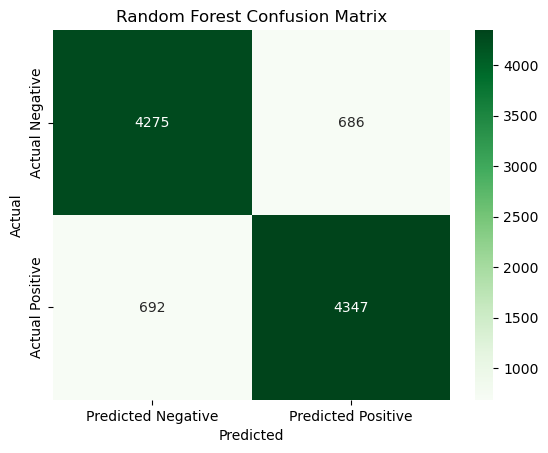

In [15]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_acc = round((rf.score(X_test, y_test) * 100), 1)
rf_precision = round((precision_score(y_test, y_pred) * 100), 1)
rf_recall = round((recall_score(y_test, y_pred) * 100), 1)
rf_f1 = round((f1_score(y_test, y_pred) * 100), 1)

cm = confusion_matrix(y_test, y_pred)
x_labels = ["Predicted Negative", "Predicted Positive"]
y_labels = ["Actual Negative", "Actual Positive"]
sns.heatmap(data=cm, fmt="d", annot=True, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [16]:
model_names = ["Naïve Bayes", "SVM", "Random Forest"]
model_accuracies = [mnb_acc, svm_acc, rf_acc]
model_precisions = [mnb_precision, svm_precision, rf_precision]
model_recalls = [mnb_recall, svm_recall, rf_recall]
model_f1s = [mnb_f1, svm_f1, rf_f1]
model_eval_df = pd.DataFrame({"Model Name": model_names, "Model Accuracy": model_accuracies, "Model Precision": model_precisions, "Model Recall": model_recalls, "Model F1 Score": model_f1s})
model_eval_df

,Model Name,Model Accuracy,Model Precision,Model Recall,Model F1 Score
0,Naïve Bayes,86.7,88.0,85.1,86.6
1,SVM,89.4,88.7,90.5,89.6
2,Random Forest,86.2,86.4,86.3,86.3
